In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def eom(t,y):
    """
    Earth's equation of motion respect to the Sum
    
    Input
    ------
    y: an (4,) array with the values [rx,ry,vx,vy] from last step
    
    Output
    ------
    y': an (4,) array with the values [rx',ry',vx',vy'] in this step
    """
    # Constant
    GM = 9.90349e20
    
    # Get solutions from the last step
    rx,ry,vx,vy = y
    
    # Calculate R
    R = np.sqrt(rx**2 + ry**2)
    
    # r_dot
    rx_dot = vx
    ry_dot = vy
    # v_dot
    vx_dot = -GM*rx/R**3
    vy_dot = -GM*ry/R**3
    
    return [rx_dot,ry_dot,vx_dot,vy_dot]

In [3]:
# constants
au = 1.49e8 # km
yr = 356 # days per year

# initial condition
rx0 = 1*au
ry0 = 0*au
vx0 = 0
vy0 = 2.57e6
y0 = [rx0,ry0,vx0,vy0]

# time
t0 = 0
tf = 1*yr 
# how many steps to be calculated
t_eval = np.linspace(t0,tf,1000)

# tolerance
rtol = 1e-6
atol = 1e-11

# Solving IVP problem
eomsol = solve_ivp(eom,[t0,tf],y0,t_eval=t_eval,rtol=rtol,atol=atol)

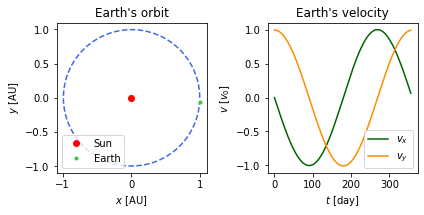

In [4]:
fig, axs = plt.subplots(1,2)
# Orbit subplot
# Earth orbit
axs[0].plot(eomsol.y[0]/au,eomsol.y[1]/au,'--',color='royalblue')
# Solar position
axs[0].plot(0,0,'ro',label='Sun')
# last Earth position
axs[0].plot(eomsol.y[0,-1]/au,eomsol.y[1,-1]/au,'.',color='limegreen',label='Earth')
axs[0].legend(loc='lower left')
axs[0].set_title('Earth\'s orbit')
axs[0].set_xlabel(r'$x$ [AU]')
axs[0].set_ylabel(r'$y$ [AU]')
axs[0].set_box_aspect(1)

# Velocity subplot
axs[1].plot(eomsol.t,eomsol.y[2]/vy0,color='darkgreen',label='$v_x$')
axs[1].plot(eomsol.t,eomsol.y[3]/vy0,color='darkorange',label='$v_y$')
axs[1].legend(loc='best')
axs[1].set_title('Earth\'s velocity')
axs[1].set_xlabel(r'$t$ [day]')
axs[1].set_ylabel(r'$v~[v_0]$')
axs[1].set_box_aspect(1)

fig.tight_layout()
#plt.savefig('orbit_earth.png',dpi=100,bbox_inches='tight')

plt.show()

In [5]:
def eom_3body(t,y,trig=None):
    """
    Eoms with respect to the Sun, Earth and Jupiter
    
    Input
    ------
    y: an (12,) array with the values [rsx,rsy,rex,rey,rjx,rjy,vsx,vsy,vex,vey,vjx,vjy] from last step
    trig: [t_trig,fac]
    
    Output
    ------
    y': an (12,) array with the values [rsx',rsy',rex',rey',rjx',rjy',vsx',vsy',vex',vey',vjx',vjy'] in this step
    """
    # Constants
    GMs = 9.90349e20
    GMj = 9.41055e17
    # Will GMj trigger changed?
    if trig is None:
        pass
    else:
        t_trig,fac = trig
        if t < t_trig:
            pass
        else:
            GMj = fac*GMj

    # Get the solutions from the last step
    rsx,rsy,rex,rey,rjx,rjy,vsx,vsy,vex,vey,vjx,vjy = y
    
    # Calculate the relative R
    # Sun-Earth distance
    rse_x = rsx - rex
    rse_y = rsy - rey
    Rse = np.sqrt(rse_x**2 + rse_y**2)
    # Sun-Jupiter distance
    rsj_x = rsx - rjx
    rsj_y = rsy - rjy
    Rsj = np.sqrt(rsj_x**2 + rsj_y**2)
    # Jupiter-Earth distance
    rje_x = rjx - rex
    rje_y = rjy - rey
    Rje = np.sqrt(rje_x**2 + rje_y**2)
    
    # Equations of motions
    # Solar eom
    rsx_dot = vsx
    rsy_dot = vsy
    vsx_dot = -GMj*rsj_x/Rsj**3
    vsy_dot = -GMj*rsj_y/Rsj**3
    # Earth case
    rex_dot = vex
    rey_dot = vey
    vex_dot = GMs*rse_x/Rse**3 + GMj*rje_x/Rje**3
    vey_dot = GMs*rse_y/Rse**3 + GMj*rje_y/Rje**3
    # Jovian case
    rjx_dot = vjx
    rjy_dot = vjy
    vjx_dot = GMs*rsj_x/Rsj**3
    vjy_dot = GMs*rsj_y/Rsj**3
    
    return [rsx_dot,rsy_dot,rex_dot,rey_dot,rjx_dot,rjy_dot,
            vsx_dot,vsy_dot,vex_dot,vey_dot,vjx_dot,vjy_dot]

In [6]:
# initial conditions
# positions
rsx0 = 0
rsy0 = 0
rex0 = 1*au
rey0 = 0
rjx0 = 5.2*au
rjy0 = 0*au
# velocities
vsx0 = 0
vsy0 = 0
vex0 = 0
vey0 = 2.57e6
vjx0 = 0
vjy0 = 1.13e6
y0 = [rsx0,rsy0,rex0,rey0,rjx0,rjy0,vsx0,vsy0,vex0,vey0,vjx0,vjy0]

# time
t0 = 0
tf = 25*yr 
# how many steps to be calculated
t_eval = np.linspace(t0,tf,10000)

# trigger
t_trig = [5*yr,100]

# tolerance
rtol = 1e-5
atol = 1e-10

f = lambda t,y: eom_3body(t,y,t_trig)

# Solving IVP problem
eomsol = solve_ivp(f,[t0,tf],y0 = y0,t_eval = t_eval,rtol = rtol,atol = atol)

# Solving IVP problem, no change
eomsol_no = solve_ivp(eom_3body,[t0,tf],y0 = y0,t_eval = t_eval,rtol = rtol,atol = atol)

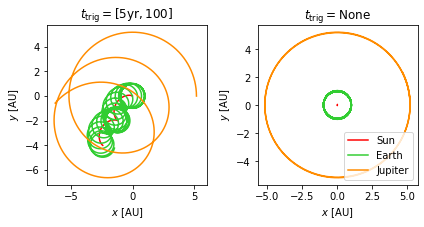

In [7]:
fig, axs = plt.subplots(1,2)
# Orbit subplot
axs[0].plot(eomsol.y[0]/au,eomsol.y[1]/au,color='red',label='Sun')
axs[0].plot(eomsol.y[2]/au,eomsol.y[3]/au,color='limegreen',label='Earth')
axs[0].plot(eomsol.y[4]/au,eomsol.y[5]/au,color='darkorange',label='Jupiter')
axs[0].set_title(r'$t_{\rm trig}=[5{\rm yr},100]$')
axs[0].set_xlabel(r'$x$ [AU]')
axs[0].set_ylabel(r'$y$ [AU]')
axs[0].set_xlim([-6,6])
axs[0].set_ylim([-6,6])
#axs[0].set_box_aspect(1)
axs[0].axis('square')

# Orbit subplot
axs[1].plot(eomsol_no.y[0]/au,eomsol_no.y[1]/au,color='red',label='Sun')
axs[1].plot(eomsol_no.y[2]/au,eomsol_no.y[3]/au,color='limegreen',label='Earth')
axs[1].plot(eomsol_no.y[4]/au,eomsol_no.y[5]/au,color='darkorange',label='Jupiter')
axs[1].legend(loc='lower right')
axs[1].set_title(r'$t_{\rm trig}=$None')
axs[1].set_xlabel(r'$x$ [AU]')
axs[1].set_ylabel(r'$y$ [AU]')
axs[1].set_xlim([-6,6])
axs[1].set_ylim([-6,6])
#axs[1].set_box_aspect(1)
axs[1].axis('square')

fig.tight_layout()
#plt.savefig('orbit_chaotic.png',dpi=100,bbox_inches='tight',facecolor='white')

plt.show()